# ML Use Case: Wine Quality Prediction

# ML Algorithms used : K-NEAREST NEIGHBOURS (KNN)

# Step 1 : Problem Understanding

#### To predict the quality of wines based on the selection features in the dataset using K-Nearest Neighbours (KNN) algorithm.

# Step 2 : Data Understanding

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
cd C:\Users\user\Documents\##jupyter notebook\knn model

C:\Users\user\Documents\##jupyter notebook\knn model


In [38]:
# Read dataset winequality
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
# Get summary of numerical variables
df.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Step 3 : Data Preparation

In [40]:
# Check if there are missing values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is no missing values shown for all the features in the dataset

# Step 4 : Modelling

In [41]:
# Splitting the dataset to 3 : 7 ratio

from sklearn.model_selection import train_test_split

copy = df.copy()
train_set = (
    copy.groupby('quality')
        .apply(lambda s: s.sample(frac=0.70, random_state=42))
        .reset_index(drop=True)
)

test_set = copy.drop(train_set.index)

In [42]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
1,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
3,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
4,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1116,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1117,7.8,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
1118,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8


In [43]:
test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
1121,6.6,0.500,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
# import to csv file
train_set.to_csv('train_set.csv')
test_set.to_csv('test_set.csv')

### Feature Selection by using Feature importance method

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
X = df.iloc[:,0:11] #features
Y = df.iloc[:,-1] #target column

[0.07812527 0.09433221 0.07990368 0.07769148 0.07674219 0.07393528
 0.10155141 0.08528211 0.0755521  0.10340598 0.15347829]


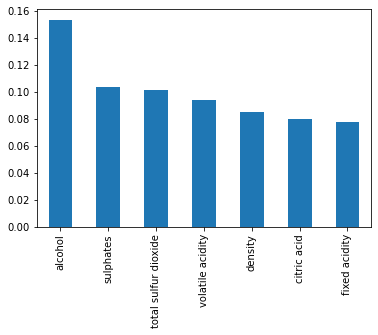

In [47]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_impor = pd.Series(model.feature_importances_, index = X.columns)
feat_impor.nlargest(7).plot(kind = 'bar')
plt.show()

#### From the graph above, the top 5 features that give impact for the wine quality are 'alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'density', 'citric acid', and 'fixed acidity'

### Building a predictive model using KNN Machine Learning Algorithms

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [49]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(train_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']], train_set['quality'])
    y_pred = knn.predict(test_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']])
    scores[k] = metrics.accuracy_score(test_set['quality'],y_pred)
    scores_list.append(metrics.accuracy_score(test_set['quality'],y_pred))

scores

{1: 0.8475991649269311,
 2: 0.7181628392484343,
 3: 0.6555323590814196,
 4: 0.6409185803757829,
 5: 0.6367432150313153,
 6: 0.6242171189979123,
 7: 0.6137787056367432,
 8: 0.5991649269311065,
 9: 0.6033402922755741,
 10: 0.5949895615866388,
 11: 0.5866388308977035,
 12: 0.5991649269311065,
 13: 0.6012526096033403,
 14: 0.5803757828810021,
 15: 0.5824634655532359,
 16: 0.5845511482254697,
 17: 0.5678496868475992,
 18: 0.5615866388308977,
 19: 0.5260960334029228,
 20: 0.5469728601252609,
 21: 0.5407098121085595,
 22: 0.534446764091858,
 23: 0.5260960334029228,
 24: 0.5281837160751566,
 25: 0.534446764091858}

#### From the accuracy value above, the highest accuracy can be detected when k=1

In [50]:
# When k=1
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(train_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']], train_set['quality'])
y_pred = knn.predict(test_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']])

# display the information
print ('Accuracy:', accuracy_score(test_set['quality'],y_pred))
print ('Recall:', recall_score(test_set['quality'],y_pred, average="weighted"))
print ('Precision:', precision_score(test_set['quality'],y_pred, average="weighted"))
confusion = confusion_matrix(test_set['quality'],y_pred)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.8475991649269311
Recall: 0.8475991649269311
Precision: 0.8491850478637037
Confusion matrix:
[[  4   0   0   1   0   0]
 [  1  14   4   1   1   0]
 [  0   1 159  23   3   1]
 [  0   1  19 190   7   1]
 [  0   0   0   7  35   0]
 [  0   0   0   1   1   4]]


#### The K-Nearest Neighbors (KNN) model was able to predict wine quality with reasonable accuracy. The overall accuracy of the model is about 84.76%, which means that roughly 85 out of every 100 wines were correctly classified. The recall is also 84.76%, indicating that the model is able to identify most of the true wine quality classes in the test set. The precision is slightly higher at 84.92%, showing that when the model predicts a certain quality level, it is correct most of the time. Overall, the model demonstrates consistent performance and is fairly reliable in predicting wine quality based on the selected features.

In [52]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(train_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']], train_set['quality'])
y_pred = knn.predict(test_set[['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'density', 'citric acid', 'residual sugar']])

#show prediction
results = pd.DataFrame({'Real values ': test_set['quality'], 'Predicted values ': y_pred})

# Export to CSV
results.to_csv('prediction_results.csv', index=False)

#### Prediction results have been saved to prediction_results.csv